<h2>Logistic Regression</h2>
<h4>Description</h4>
Logistic regression is a statistical method used for binary classification problems, where the outcome can be one of two possible classes (e.g., apple vs. orange, spam vs. not spam)

<h4>Linear Combination</h4>
Logistic regression starts by combining the features linearly. This means it calculates a weighted sum of the features. Mathematically, it looks like this:

$$
    z = B_0 + B_1 X_1 + B_2 X_2 + ... + B_n X_n
$$

Here, $B_0$ is the intercept (bias), and $B_1$, $B_2$, ..., $B_n$ are the coefficients (weights) for each feature $X_1$, $X_2$, ..., $X_n$.

<h4>Logistic (Sigmoid) Function</h4>
The linear combination $z$ is then passed through the logistic (sigmoid) function to transform it into a probability value between 0 and 1:

$$
    σ(z) = \frac{1}{1 + e^{-z}}
$$

This function maps any real-valued number into the (0, 1) interval.

<h4>Decision Boundary</h4>
To make a classification decision, a threshold (typically 0.5) is applied to the probability.

$$
    \hat{y} = \begin{cases} 
    1 & \text{if } σ(z) \geq 0.5 \\
    0 & \text{if } σ(z) < 0.5 
    \end{cases}
$$


<h4>Importing libraries</h4>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

<h4>Loading dataset</h4>

In [2]:
df = pd.read_csv("Social_Network_Ads.csv")
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [3]:
print(X)

[[    19  19000]
 [    35  20000]
 [    26  43000]
 [    27  57000]
 [    19  76000]
 [    27  58000]
 [    27  84000]
 [    32 150000]
 [    25  33000]
 [    35  65000]
 [    26  80000]
 [    26  52000]
 [    20  86000]
 [    32  18000]
 [    18  82000]
 [    29  80000]
 [    47  25000]
 [    45  26000]
 [    46  28000]
 [    48  29000]
 [    45  22000]
 [    47  49000]
 [    48  41000]
 [    45  22000]
 [    46  23000]
 [    47  20000]
 [    49  28000]
 [    47  30000]
 [    29  43000]
 [    31  18000]
 [    31  74000]
 [    27 137000]
 [    21  16000]
 [    28  44000]
 [    27  90000]
 [    35  27000]
 [    33  28000]
 [    30  49000]
 [    26  72000]
 [    27  31000]
 [    27  17000]
 [    33  51000]
 [    35 108000]
 [    30  15000]
 [    28  84000]
 [    23  20000]
 [    25  79000]
 [    27  54000]
 [    30 135000]
 [    31  89000]
 [    24  32000]
 [    18  44000]
 [    29  83000]
 [    35  23000]
 [    27  58000]
 [    24  55000]
 [    23  48000]
 [    28  79000]
 [    22  1800

In [4]:
print(y)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1
 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 0 1 1 0 1 0 0 1
 1 0 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 0 0
 1 1 0 1 1 1 1 1 0 0 0 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 0 1 1 0 1 0
 0 1 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1
 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1]


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

In [6]:
print(X_train)

[[    37  57000]
 [    41  71000]
 [    35  72000]
 [    38  71000]
 [    25  79000]
 [    35  44000]
 [    36 118000]
 [    37  80000]
 [    38  55000]
 [    40  75000]
 [    56 104000]
 [    22  18000]
 [    31  18000]
 [    27  89000]
 [    26 118000]
 [    59  88000]
 [    45  45000]
 [    28  84000]
 [    35  91000]
 [    42  79000]
 [    42  65000]
 [    25  87000]
 [    31  66000]
 [    34 112000]
 [    23  63000]
 [    58 101000]
 [    25  90000]
 [    37  74000]
 [    57  26000]
 [    50  20000]
 [    19  85000]
 [    40  57000]
 [    40  60000]
 [    36  52000]
 [    41  45000]
 [    28  32000]
 [    53  82000]
 [    18  86000]
 [    48  29000]
 [    30  62000]
 [    59  83000]
 [    47  25000]
 [    22  27000]
 [    60  42000]
 [    26  80000]
 [    27  90000]
 [    32  18000]
 [    58  38000]
 [    29  43000]
 [    57  33000]
 [    49  36000]
 [    33  31000]
 [    37  77000]
 [    59  29000]
 [    39 134000]
 [    41  59000]
 [    28  55000]
 [    29  61000]
 [    54  2600

In [7]:
print(X_test)

[[    21  68000]
 [    48 119000]
 [    35  71000]
 [    36  54000]
 [    53 143000]
 [    35  55000]
 [    57  74000]
 [    36 144000]
 [    42 104000]
 [    47  50000]
 [    28  59000]
 [    58  47000]
 [    35  47000]
 [    35  57000]
 [    20  49000]
 [    32 117000]
 [    48 131000]
 [    24  23000]
 [    47 105000]
 [    41  79000]
 [    35  61000]
 [    18  82000]
 [    41  72000]
 [    26  81000]
 [    26  72000]
 [    19  25000]
 [    30  79000]
 [    39  75000]
 [    48  35000]
 [    32 120000]
 [    29  83000]
 [    24  32000]
 [    40  78000]
 [    55  39000]
 [    30 116000]
 [    46  59000]
 [    40  75000]
 [    24  89000]
 [    49  28000]
 [    38  61000]
 [    33 113000]
 [    26  86000]
 [    32 117000]
 [    39  71000]
 [    55 125000]
 [    46  41000]
 [    29 148000]
 [    35  53000]
 [    37 144000]
 [    48  96000]
 [    25  22000]
 [    26  43000]
 [    37  78000]
 [    24  19000]
 [    38  61000]
 [    46  88000]
 [    46  28000]
 [    42  70000]
 [    49  2800

In [8]:
print(y_train)

[0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 1
 0 1 0 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1
 0 0 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0
 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 1 0
 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 1 1 0 1 0 1 0 1 0 0 1
 0 0 1 1 0 1 0 0 1 0 1 0 1 1 0 1 0 0 0 1 0 1 1 0 0 0 1 1 0 1 0 0 1 1 1 0 1
 1 0 1 1 1 0 0 1 0 1 0 0 0 1 0 1 1 0 1 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 1
 0 0 1 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0]


In [9]:
print(y_test)

[0 1 0 0 1 0 1 1 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0
 0 1 0 0 0 1 0 1 1 1 0 1 1 0 0 1 0 0 1 1 0 1 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0
 1 0 0 0 0 0]


<h4>Feature Scaling</h4>

In [10]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [11]:
print(X_train)

[[-0.07044011 -0.3754824 ]
 [ 0.30839748  0.04359113]
 [-0.25985891  0.07352495]
 [ 0.02426928  0.04359113]
 [-1.20695289  0.28306172]
 [-0.25985891 -0.76462211]
 [-0.16514951  1.45048084]
 [-0.07044011  0.31299554]
 [ 0.02426928 -0.43535005]
 [ 0.21368808  0.16332642]
 [ 1.72903844  1.03140731]
 [-1.49108108 -1.54290152]
 [-0.6386965  -1.54290152]
 [-1.01753409  0.58239995]
 [-1.11224349  1.45048084]
 [ 2.01316663  0.55246613]
 [ 0.68723507 -0.73468828]
 [-0.92282469  0.43273084]
 [-0.25985891  0.6422676 ]
 [ 0.40310687  0.28306172]
 [ 0.40310687 -0.13601181]
 [-1.20695289  0.52253231]
 [-0.6386965  -0.10607799]
 [-0.35456831  1.2708779 ]
 [-1.39637168 -0.19587946]
 [ 1.91845724  0.94160584]
 [-1.20695289  0.61233378]
 [-0.07044011  0.1333926 ]
 [ 1.82374784 -1.30343093]
 [ 1.16078205 -1.48303387]
 [-1.77520927  0.46266466]
 [ 0.21368808 -0.3754824 ]
 [ 0.21368808 -0.28568093]
 [-0.16514951 -0.52515152]
 [ 0.30839748 -0.73468828]
 [-0.92282469 -1.12382799]
 [ 1.44491025  0.37286319]
 

In [12]:
print(X_test)

[[-1.58579048 -0.04621034]
 [ 0.97136326  1.48041466]
 [-0.25985891  0.04359113]
 [-0.16514951 -0.46528387]
 [ 1.44491025  2.19882643]
 [-0.25985891 -0.43535005]
 [ 1.82374784  0.1333926 ]
 [-0.16514951  2.22876025]
 [ 0.40310687  1.03140731]
 [ 0.87665386 -0.58501916]
 [-0.92282469 -0.31561475]
 [ 1.91845724 -0.67482064]
 [-0.25985891 -0.67482064]
 [-0.25985891 -0.3754824 ]
 [-1.68049987 -0.61495299]
 [-0.5439871   1.42054702]
 [ 0.97136326  1.83962055]
 [-1.30166228 -1.3932324 ]
 [ 0.87665386  1.06134113]
 [ 0.30839748  0.28306172]
 [-0.25985891 -0.25574711]
 [-1.86991867  0.37286319]
 [ 0.30839748  0.07352495]
 [-1.11224349  0.34292937]
 [-1.11224349  0.07352495]
 [-1.77520927 -1.33336475]
 [-0.7334059   0.28306172]
 [ 0.11897868  0.16332642]
 [ 0.97136326 -1.03402652]
 [-0.5439871   1.51034849]
 [-0.8281153   0.40279701]
 [-1.30166228 -1.12382799]
 [ 0.21368808  0.2531279 ]
 [ 1.63432904 -0.91429122]
 [-0.7334059   1.39061319]
 [ 0.78194446 -0.31561475]
 [ 0.21368808  0.16332642]
 

<h4>Training a logistic regression</h4>

In [13]:
from sklearn.linear_model import LogisticRegression

logistic_reg = LogisticRegression(max_iter=500, random_state=3)
logistic_reg.fit(X_train, y_train)

LogisticRegression(max_iter=500, random_state=3)

In [14]:
y_pred = logistic_reg.predict(X_test)

<h4>Confusion Matrix</h4>

In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

print("Model accuracy:", accuracy_score(y_test, y_pred))

[[47  3]
 [11 19]]
Model accuracy: 0.825


<h4>Visualising results</h4>

C:\Users\mike3\AppData\Local\Temp\ipykernel_23020\4259593170.py:6: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_test_rescaled[y_pred == y, 0], X_test_rescaled[y_pred == y, 1], c = ListedColormap(("red", "green"))(i), label=y)


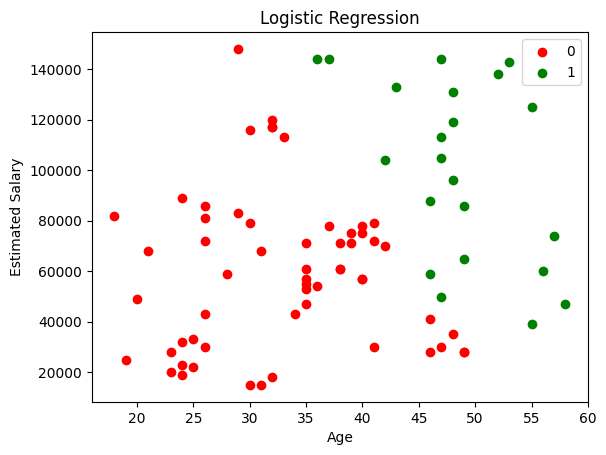

In [16]:
from matplotlib.colors import ListedColormap

X_test_rescaled = ss.inverse_transform(X_test)

for i, y in enumerate(np.unique(y_test)):
    plt.scatter(X_test_rescaled[y_pred == y, 0], X_test_rescaled[y_pred == y, 1], c = ListedColormap(("red", "green"))(i), label=y)

plt.title("Logistic Regression")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()
plt.show()